## Part1 - Data Coding and Merging

1. Import the “NHL_Team.csv” data file and name the dataframe as “NHL_Team” in Jupyter Notebook.
a) Delete the following variables: “Unnamed:0”, “abbr”, “tname”, “lname”, and “sname”.
b) Rename the variable “name” to “team_name”.
2. Import the “NHL_competition.csv” data file and name the dataframe as “NHL_Competition” in Jupyter Notebook.
a) Delete the following variables: “Unnamed: 0”, “tz”, “start”, and “end”
b) Rename the variable “name” to “competition_name”.
3. Import the “NHL_game.csv” data file and name the dataframe as “NHL_Game” in Jupyter Notebook.
a) Delete the following variables: “X”, “period”, and “status”.
4. Merge the dataframe “NHL_Team” into the dataframe “NHL_Game” by “tid.” Continue to name the merged dataframe as “NHL_Game.”
5. Merge the dataframe “NHL_Competition” into the dataframe “NHL_Game” by “comp_id.” Continue to name the merged dataframe as “NHL_Game.”
6. In the merged “NHL_Game” dataframe, create a variable “hgd” to indicate the goal difference between home and away score (hscore – ascore) and delete observations with missing value in the variable “hgd”.
7. Drop all observations with missing values, if there is still any, from the “NHL_Game” dataframe.
8. Convert the type of the “date” variable from “object” to “datetime.”
9. Sort the NHL games by “date” and show the first 15 observations.
10. Create two dataframes that separate the “NHL_Game” dataframe by home and away games. Name them “NHL_Home” and “NHL_Away”, respectively.
a) Rename variables:
     i) For away games, rename “ascore” to “goals_for”; rename “hscore” to “goals_against”
     ii) For home games, rename “hscore” to “goals_for”; rename “ascore” to “goals_against” 
b) Create a “win” variable that equals to 1 if the team won the game; 0 if the team lost the game; and 0.5 if it was a draw. 
11. Append the “NHL_Home” and “NHL_Away” dataframes to be the new “NHL_Game” dataframe.
12. Generate a team level dataframe that aggregates the total number of games won, the total number of “goals_for” and “goals_against” for each team in each competition. Name this new dataframe “NHL_Team_Stats”. Make sure to convert the indexes of the new dataframe back as  variables. 
13. Create a dataframe “NHL_Game_Count” that include the total number of games played by each team in each competition. Name this new variable in the dataframe “game_count”.
14. Merge dataframes.
a) Merge the “NHL_Game_Count” dataframe into the “NHL_Team_Stats” dataframe by “tid”, “competition_name”, and “type”. Continue to name the merged dataframe “NHL_Team_Stats”.
b) Merge the “NHL_Team” dataframe into the “NHL_Team_Stats” dataframe by “tid”. Continue to name the merged dataframe “NHL_Team_Stats”.
15. Import the “pp.pk.ppgf.csv” data file and name the dataframe as “NHL_PPPK” in Jupyter Notebook. Merge the “NHL_PPPK” dataframe into the “NHL_Team_Stats” dataframe by “tricode” and “competition_name”.
16. Create new variables in the “NHL_Team_Stats” dataframe.
a) Winning percentage (“win_pct”)=”win”/ total number of games played
b) Average goals for per game (“avg_gf”)=total number of goals for / total number of games played     
c) Average goals against per game (“avg_ga”)=total number of goals against / total number of games played
17. In the “NHL_Competition” dataframe, the variable “type” indicates the type of competition: type=2 – regular season. Create a dataframe that contains team statistics for games only during regular seasons. Name this dataframe “NHL_Team_R_Stats”. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
NHL_Team=pd.read_csv("Assignment Data/Week 2/NHL_team.csv")

In [3]:
display(NHL_Team)

,Unnamed: 0,tid,name,tname,lname,tricode,abbr,sname
0,1,1,Toronto Maple Leafs,Maple Leafs,Toronto,TOR,TOR,Toronto
1,2,2,Montréal Canadiens,Canadiens,Montréal,MTL,MTL,Montréal
2,3,4,Winnipeg Jets,Jets,Winnipeg,WPG,WPG,Winnipeg
3,4,5,Washington Capitals,Capitals,Washington,WSH,WSH,Washington
4,5,6,Chicago Blackhawks,Blackhawks,Chicago,CHI,CHI,Chicago
5,6,7,St. Louis Blues,Blues,St. Louis,STL,STL,St Louis
6,7,8,Pittsburgh Penguins,Penguins,Pittsburgh,PIT,PIT,Pittsburgh
7,8,10,Edmonton Oilers,Oilers,Edmonton,EDM,EDM,Edmonton
8,9,11,Calgary Flames,Flames,Calgary,CGY,CGY,Calgary
9,10,14,Philadelphia Flyers,Flyers,Philadelphia,PHI,PHI,Philadelphia


In [4]:
NHL_Team.drop(['Unnamed: 0', 'abbr', 'tname', 'lname', 'sname'], axis=1, inplace=True)
NHL_Team.head()

,tid,name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


In [5]:
NHL_Team.rename(columns={'name':'team_name'}, inplace=True)
NHL_Team.head()

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


In [6]:
NHL_Competition=pd.read_csv("Assignment Data/Week 2/NHL_competition.csv")
NHL_Competition.head()

,Unnamed: 0,comp_id,year,type,name,tz,start,end
0,1,1,2013,2,2013 NHL Regular Season,ET,NaN,NaN
1,2,2,2017,2,2017 NHL Regular Season,ET,NaN,NaN
2,3,2453,2013,3,2013 NHL Playoff,ET,NaN,NaN
3,4,2541,2017,3,2017 NHL Playoff,ET,NaN,NaN
4,5,2661,2012,2,2012 NHL Regular Season,ET,NaN,NaN


In [7]:
NHL_Competition.drop(['Unnamed: 0','tz','start','end'], axis=1, inplace=True)

In [8]:
NHL_Competition.rename(columns={'name':'competition_name'}, inplace=True)
NHL_Competition.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


In [9]:
NHL_Game=pd.read_csv("Assignment Data/Week 2/NHL_game.csv")
NHL_Game.head()

,X,gid,comp_id,date,ascore,hscore,period,status,home_away,tid
0,1,37,2,10/7/2017,NaN,NaN,NaN,NaN,away,25
1,2,67,2,10/9/2017,NaN,NaN,NaN,NaN,away,29
2,3,154,1,10/14/2013,NaN,NaN,NaN,NaN,away,29
3,4,278,1,10/24/2013,NaN,NaN,NaN,NaN,away,53
4,5,291,1,10/25/2013,NaN,NaN,NaN,NaN,away,5


In [10]:
NHL_Game.drop(['X','period','status'], axis=1, inplace=True)

In [11]:
NHL_Game=pd.merge(NHL_Game, NHL_Team, on=['tid'])
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
2,2550,2541,4/23/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
3,2649,2541,5/8/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
4,3304,2661,3/6/2013,NaN,NaN,away,25,Tampa Bay Lightning,TBL


In [12]:
NHL_Game=pd.merge(NHL_Game, NHL_Competition, on=['comp_id'])
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season


In [13]:
NHL_Game['hgd']=NHL_Game['hscore']-NHL_Game['ascore']
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,NaN
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0


In [14]:
NHL_Game=NHL_Game[pd.notnull(NHL_Game["hgd"])]

In [15]:
NHL_Game=NHL_Game.dropna()
NHL_Game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0
5,1541,2,1/31/2018,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0
6,1243,2,1/5/2018,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0


In [16]:
import datetime
NHL_Game['date']=pd.to_datetime(NHL_Game['date'])
NHL_Game['date'].head()

2   2017-12-15
3   2018-02-04
4   2018-03-30
5   2018-01-31
6   2018-01-05
Name: date, dtype: datetime64[ns]

In [17]:
NHL_Game['date'].describe()

<ipython-input-17-c46c0c60d7d9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  NHL_Game['date'].describe()


count                   18506
unique                   1607
top       2015-03-08 00:00:00
freq                       30
first     2010-10-07 00:00:00
last      2018-06-08 00:00:00
Name: date, dtype: object

In [18]:
NHL_Game.sort_values(by=['date'], ascending=[True]).head(15)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
8424,5666,5662,2010-10-07,4.0,3.0,away,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,-1.0
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,-1.0
9006,5664,5662,2010-10-07,3.0,2.0,away,14,Philadelphia Flyers,PHI,2010,2,2010 NHL Regular Season,-1.0
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,-1.0
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,1.0
8697,5662,5662,2010-10-07,2.0,3.0,away,2,Montréal Canadiens,MTL,2010,2,2010 NHL Regular Season,1.0
9742,5672,5662,2010-10-08,3.0,2.0,away,16,San Jose Sharks,SJS,2010,2,2010 NHL Regular Season,-1.0
9546,5681,5662,2010-10-08,2.0,1.0,home,32,Ottawa Senators,OTT,2010,2,2010 NHL Regular Season,-1.0
8975,5679,5662,2010-10-08,0.0,4.0,home,18,Detroit Red Wings,DET,2010,2,2010 NHL Regular Season,4.0
10004,5668,5662,2010-10-08,3.0,4.0,away,6,Chicago Blackhawks,CHI,2010,2,2010 NHL Regular Season,1.0


In [19]:
NHL_Home=NHL_Game[(NHL_Game.home_away == 'home')].copy()
NHL_Home.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0


In [20]:
NHL_Away=NHL_Game[(NHL_Game.home_away=='away')].copy()
NHL_Away.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2,981,2,2017-12-15,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2018-02-04,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,2018-03-30,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0
5,1541,2,2018-01-31,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0
6,1243,2,2018-01-05,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0


In [21]:
NHL_Away.rename(columns={'ascore':'goals_for'}, inplace=True)
NHL_Away.rename(columns={'hscore':'goals_against'}, inplace=True)
NHL_Home.rename(columns={'hscore':'goals_for'}, inplace=True)
NHL_Home.rename(columns={'ascore':'goals_against'}, inplace=True)
NHL_Away.head()

,gid,comp_id,date,goals_for,goals_against,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2,981,2,2017-12-15,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2018-02-04,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,2018-03-30,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0
5,1541,2,2018-01-31,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0
6,1243,2,2018-01-05,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0


In [22]:
NHL_Home.loc[(NHL_Home['hgd']>0, 'win')] = 1
NHL_Home.loc[(NHL_Home['hgd']<0, 'win')] = 0
NHL_Home.loc[(NHL_Home['hgd']==0, 'win')] = 0.5

NHL_Away.loc[(NHL_Away['hgd']<0, 'win')] = 1
NHL_Away.loc[(NHL_Away['hgd']>0, 'win')] = 0
NHL_Away.loc[(NHL_Away['hgd']==0, 'win')] = 0.5

In [23]:
NHL_Game=pd.concat([NHL_Home, NHL_Away], axis=0)
display(NHL_Game)

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0,1.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,5300,5181,2017-04-27,2.0,3.0,away,8,Pittsburgh Penguins,PIT,2016,3,2016 NHL Playoff,-1.0,1.0
18935,5242,5181,2017-04-18,3.0,2.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,1.0,0.0
18936,5245,5181,2017-04-21,4.0,1.0,away,6,Chicago Blackhawks,CHI,2016,3,2016 NHL Playoff,3.0,0.0
18942,5265,5181,2017-04-16,3.0,2.0,away,11,Calgary Flames,CGY,2016,3,2016 NHL Playoff,1.0,0.0


In [24]:
NHL_Game.shape

(18506, 14)

In [25]:
NHL_Team_Stats = NHL_Game.groupby(['tid','competition_name','type'])['win','goals_for','goals_against'].sum()
NHL_Team_Stats.head()

<ipython-input-25-e23d8a84621f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  NHL_Team_Stats = NHL_Game.groupby(['tid','competition_name','type'])['win','goals_for','goals_against'].sum()


win  goals_for  goals_against
tid competition_name        type                                
1   2010 NHL Regular Season 2     36.0      223.0          259.0
    2011 NHL Regular Season 2     20.0      129.0          129.0
    2012 NHL Playoff        3      3.0       18.0           22.0
    2012 NHL Regular Season 2     25.0      144.0          129.0
    2013 NHL Regular Season 2     38.0      231.0          250.0

In [26]:
NHL_Team_Stats=NHL_Team_Stats.reset_index()
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,18.0,22.0
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0


In [27]:
NHL_Game_Count=NHL_Game.groupby(['tid','competition_name','type']).size().reset_index(name='game_count')
display(NHL_Game_Count)

,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
...,...,...,...,...
364,66,2014 NHL Regular Season,2,82
365,66,2015 NHL Regular Season,2,81
366,66,2016 NHL Regular Season,2,82
367,66,2017 NHL Regular Season,2,80


In [28]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Game_Count, on=['tid','competition_name','type'])
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79


In [29]:
NHL_Team_Stats=pd.merge(NHL_Team_Stats, NHL_Team, on=['tid'])
NHL_Team_Stats.head()

,tid,competition_name,type,win,goals_for,goals_against,game_count,team_name,tricode
0,1,2010 NHL Regular Season,2,36.0,223.0,259.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,3.0,18.0,22.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,25.0,144.0,129.0,46,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,38.0,231.0,250.0,79,Toronto Maple Leafs,TOR


In [30]:
NHL_PPPK=pd.read_csv("Assignment Data/Week 2/PP.PK.PPgf.csv")
NHL_PPPK.head()

,tricode,pp,pk,ppgf,competition_name
0,ANA,35,27,9.0,2010 NHL Playoff
1,BOS,126,116,22.0,2010 NHL Playoff
2,BUF,48,46,13.0,2010 NHL Playoff
3,CHI,27,39,6.0,2010 NHL Playoff
4,DET,59,55,6.0,2010 NHL Playoff


In [31]:
NHL_Team_Stats=pd.merge(NHL_PPPK, NHL_Team_Stats, on=['tricode','competition_name'])
NHL_Team_Stats.head()

,tricode,pp,pk,ppgf,competition_name,tid,type,win,goals_for,goals_against,game_count,team_name
0,ANA,35,27,9.0,2010 NHL Playoff,21,3,2.0,19.0,22.0,6,Anaheim Ducks
1,BOS,126,116,22.0,2010 NHL Playoff,20,3,16.0,76.0,48.0,24,Boston Bruins
2,BUF,48,46,13.0,2010 NHL Playoff,17,3,3.0,17.0,22.0,7,Buffalo Sabres
3,CHI,27,39,6.0,2010 NHL Playoff,6,3,3.0,22.0,16.0,7,Chicago Blackhawks
4,DET,59,55,6.0,2010 NHL Playoff,18,3,7.0,36.0,27.0,11,Detroit Red Wings


In [32]:
NHL_Team_Stats['win_pct']=NHL_Team_Stats['win']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_gf']=NHL_Team_Stats['goals_for']/NHL_Team_Stats['game_count']
NHL_Team_Stats['avg_ga']=NHL_Team_Stats['goals_against']/NHL_Team_Stats['game_count']

In [33]:
NHL_Team_Stats['win_pct'].describe()

count    369.000000
mean       0.472158
std        0.134584
min        0.000000
25%        0.406667
50%        0.500000
75%        0.562500
max        0.800000
Name: win_pct, dtype: float64

In [34]:
NHL_Team_R_Stats=NHL_Team_Stats[(NHL_Team_Stats.type == 2)]

## Part 2 - Descriptive and Summary Analyses

1. In the “NHL_Game” dataframe, calculate summary statistics for the  “goals_for” variable; calculate summary statistics for the “goals_against” variable based on whether it is home or away game.

2. Create a histogram of the “goals_against” variable by whether the game is home or away 
a) Make the color of the histogram green
b) Set the number of bins to be 20
c) Make sure the two sub-histograms share the same ranges for the x-axis and y-axis.

In [35]:
NHL_Game['goals_for'].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [36]:
NHL_Game.groupby(['home_away'])['goals_against'].describe()

,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


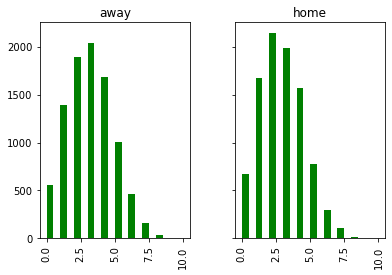

In [37]:
import matplotlib.pyplot as plt
NHL_Game.hist(by='home_away', column='goals_against', color='green', bins=20, sharex=True, sharey=True)
plt.savefig('goals_against.png')

## Part3 - Correlation Analyses

1. In the “NHL_Team_R_Stats” dataframe, make a scatter plot to depict the relationship between the total number of goals for and the winning percentage. 
a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
b) Add a regression line to the scatter plot.
c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

2. In the “NHL_Team_R_Stats” dataframe, calculate the correlation coefficient between total number of goals for and winning percentage.

3. Create a scatter plot of the total number of goals for and winning percentage similar to step 1 for regular season games. In this graph, group observations by “competition_name”.

    a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
    
    b) Add a regression line to the scatter plot.
    
    c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
    
    d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

4. For the “NHL_Team_R_Stats” dataframe, delete observations of 2011 and 2012 seasons. Continue to name the dataframe “NHL_Team_R_Stats”.

5. In the new “NHL_Team_R_Stats” dataframe, create a scatter plot of total number of goals for and winning percentage.

    a) Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
    
    b) Add a regression line to the scatter plot.
    
    c) Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
    
    d) Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

6. Calculate the correlation coefficient between total number of goals for and winning percentage in the updated “NHL_Team_R_Stats” dataframe.

7. Save dataframes as csv files. 

    a) Name the updated “NHL_Game” dataframe as “NHL_Game2”.
    
    b) Name the “NHL_Team_Stats” dataframe as “NHL_Team_Stats”.
    
    c) Name the “NHL_Team_R_Stats” dataframe as “NHL_Team_R_Stats”.
    
    d) Make sure to exclude the index as a column in the csv files.

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

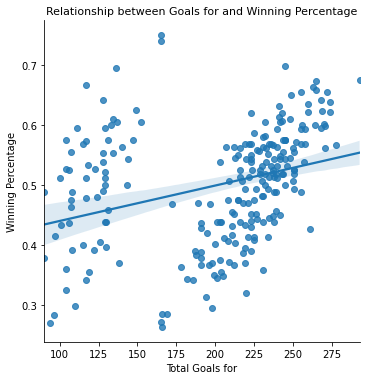

In [38]:
import seaborn as sns
sns.lmplot(x='goals_for', y='win_pct', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [39]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.31566456280848165

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

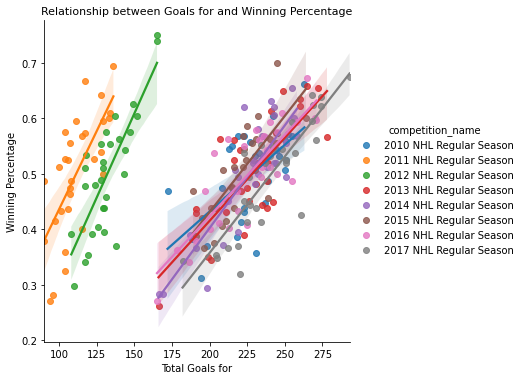

In [40]:
sns.lmplot(x='goals_for', y='win_pct', hue='competition_name', data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [41]:
NHL_Team_R_Stats=NHL_Team_R_Stats[(NHL_Team_R_Stats.competition_name != '2011 NHL Regular Season')&(NHL_Team_R_Stats.competition_name != '2012 NHL Regular Season')]

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

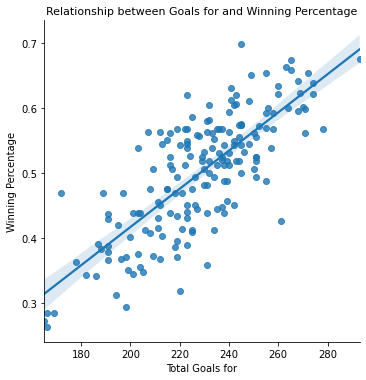

In [42]:
sns.lmplot(x='goals_for', y='win_pct',  data=NHL_Team_R_Stats)
plt.xlabel('Total Goals for')
plt.ylabel('Winning Percentage')
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

In [43]:
NHL_Team_R_Stats['goals_for'].corr(NHL_Team_R_Stats['win_pct'])

0.770625532180144

In [45]:
NHL_Game.to_csv("Assignment Data/NHL_Game2.csv", index=False)
NHL_Team_Stats.to_csv("Assignment Data/NHL_Team_Stats.csv", index=False)
NHL_Team_R_Stats.to_csv("Assignment Data/NHL_Team_R_Stats.csv", index=False)